In [1]:
%%capture
%pip install -r requirements.txt

# Load the data

In [2]:
from customer_focus_churn_rfm import load_data

data = load_data(sample=0.1)
data

data.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime', 'product_class',
       'address_id', 'birthdate', 'gender', 'job_type', 'email_provider',
       'flag_phone_provided', 'flag_privacy', 'postal_code', 'district',
       'region', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')

The last purchase date in the dataset is: 2023-04-30 20:56:57


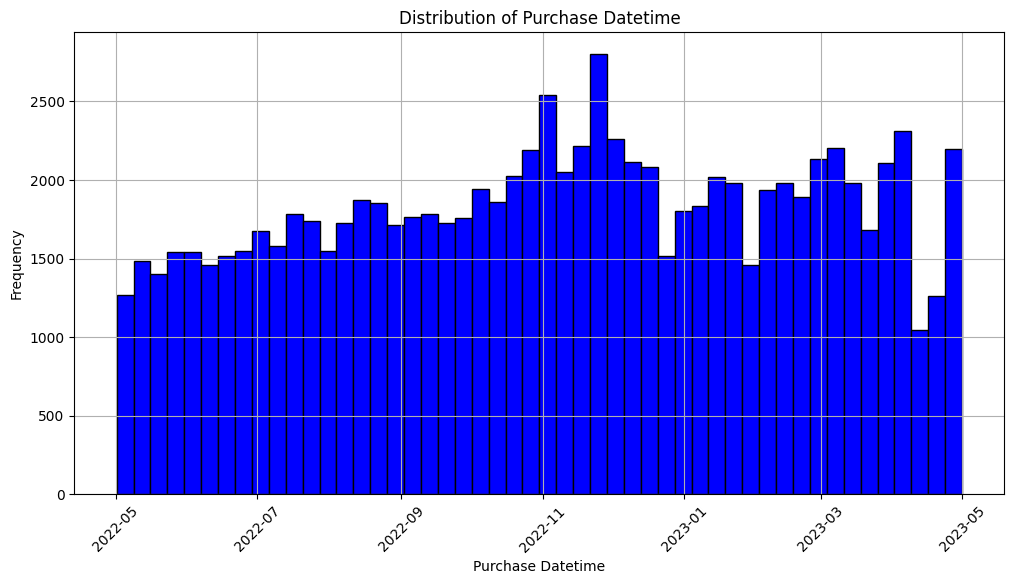

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert purchase_datetime to datetime if it's not already
data['purchase_datetime'] = pd.to_datetime(data['purchase_datetime'])
last_purchase_date = data['purchase_datetime'].max()
print(f"The last purchase date in the dataset is: {last_purchase_date}")

# Plot the purchase_datetime data
plt.figure(figsize=(12, 6))
plt.hist(data['purchase_datetime'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Purchase Datetime')
plt.xlabel('Purchase Datetime')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipykernel_69849/1241266858.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['purchase_diff'].fillna(data['last_purchase_diff'], inplace=True)


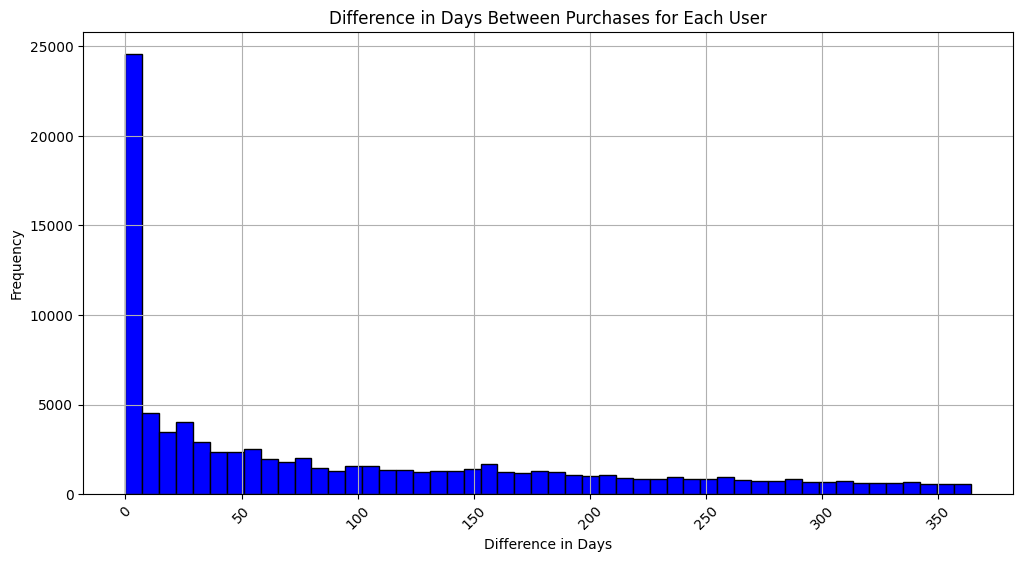

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'purchase_datetime' is in datetime format
data['purchase_datetime'] = pd.to_datetime(data['purchase_datetime'])

# Sort data by customer_id and purchase_datetime
data = data.sort_values(by=['customer_id', 'purchase_datetime'])

# Calculate the difference in days between consecutive purchases for each user
data['purchase_diff'] = data.groupby('customer_id')['purchase_datetime'].diff().dt.days

# Calculate the last day in the dataset
last_day = data['purchase_datetime'].max()

# Calculate the difference between the last purchase date and the last day in the dataset
last_purchase_diff = data.groupby('customer_id')['purchase_datetime'].max().apply(lambda x: (last_day - x).days)

# Merge the last purchase difference back to the original data
data = data.merge(last_purchase_diff.rename('last_purchase_diff'), on='customer_id')

# Fill NaN values in 'purchase_diff' with the 'last_purchase_diff'
data['purchase_diff'].fillna(data['last_purchase_diff'], inplace=True)

# Drop the 'last_purchase_diff' column as it's no longer needed
data.drop(columns=['last_purchase_diff'], inplace=True)

# Plot the differences using a histogram
plt.figure(figsize=(12, 6))
plt.hist(data['purchase_diff'], bins=50, color='blue', edgecolor='black')
plt.title('Difference in Days Between Purchases for Each User')
plt.xlabel('Difference in Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [5]:
# Filter rows where 'purchase_diff' is greater than 90 days
rows_with_large_diff = data[data['purchase_diff'] > 90]

# Display the filtered rows
rows_with_large_diff


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,address_id,...,flag_privacy,postal_code,district,region,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,purchase_diff
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04 18:28:51,6,21,...,True,21050.0,VA,LOMBARDIA,512658,49,standard,1,2022-09-08,130.0
7,b4d7e21e6e4a1f8fb3d821e74fa556d2,48,49,31047366,1,6.64,0.00,2022-11-14 18:55:23,3,46,...,True,21012.0,VA,LOMBARDIA,456894,49,premium,1,2022-08-08,95.0
11,82e3848b9b93440ddf92a6021070d248,50,49,35567966,1,11.95,1.79,2023-01-18 15:49:19,8,48,...,True,21040.0,VA,LOMBARDIA,668686,49,premium,1,2022-11-23,102.0
12,575bc196be9cf73ad5dcc39c351a1e16,109,9,36550290,1,25.50,0.00,2022-08-23 15:27:20,14,105,...,True,6034.0,PG,UMBRIA,27528,9,standard,1,2022-01-16,250.0
13,0bd7e2d654b5cd2b2ce20471866a9d9e,155,9,32566590,1,14.90,0.00,2022-08-31 14:27:04,10,150,...,True,6134.0,PG,UMBRIA,492418,9,business standard,1,2022-08-28,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86102,2f2e45ba11861613003a63c08511155d,798598,48,35765352,1,64.50,0.00,2023-01-29 12:10:36,10,781830,...,True,25040.0,BS,LOMBARDIA,775356,48,business premium,1,2023-01-29,91.0
86109,aba2f8cd8a524be53a9dfb3bf92f0f93,798689,31,33700716,1,0.20,0.00,2023-01-29 12:57:46,10,781924,...,True,73010.0,LE,PUGLIA,775456,31,standard,1,2023-01-29,91.0
86121,16527076808c6f56a421850dfa970b1c,799015,31,81274745,1,29.94,0.06,2023-01-29 17:48:54,1,782266,...,False,72026.0,BR,PUGLIA,775835,31,premium,1,2023-01-29,91.0
86126,ace67ff3bf94a5374875877b9dde7ff8,799073,39,33817091,1,0.50,0.00,2023-01-29 17:33:50,10,782313,...,False,127.0,RM,LAZIO,775907,39,premium,1,2023-01-29,91.0


# RFM Analysis

In [6]:
from customer_focus_churn_rfm import calculate_rfm

# The RFM table provides a summary of customer behavior:
# - Recency: The number of days since the customer's last purchase. Lower values indicate more recent activity.
# - Frequency: The average number of purchases made by the customer per month. 
#   This is calculated by scaling the total number of purchases to a monthly average, 
#   starting from the customer's first purchase.
# - Monetary: The total monetary value of the customer's purchases. Higher values indicate higher spending.

rfm = calculate_rfm(data)
rfm

,recency,monetary,frequency
customer_id,,,
23,130,153.08,1.333333
32,43,1.98,1.000000
48,48,200.87,0.750000
50,102,11.95,1.000000
109,250,25.50,1.000000
...,...,...,...
934247,0,15.90,1.000000
934286,0,65.97,1.000000
934313,0,1.99,1.000000


## Verify the frequency calculation for a specific customer

In [7]:
customer_id = 23  # Replace with a valid customer_id from your dataset
customer_rfm = rfm.loc[customer_id]
print(f"Customer ID: {customer_id}")
print(f"Recency: {customer_rfm['recency']}")
print(f"Monetary: {customer_rfm['monetary']}")
print(f"Frequency: {customer_rfm['frequency']}")

Customer ID: 23
Recency: 130.0
Monetary: 153.08
Frequency: 1.3333333333333333


/tmp/ipykernel_69849/1985313719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['purchase_datetime'] = pd.to_datetime(customer_data['purchase_datetime'])


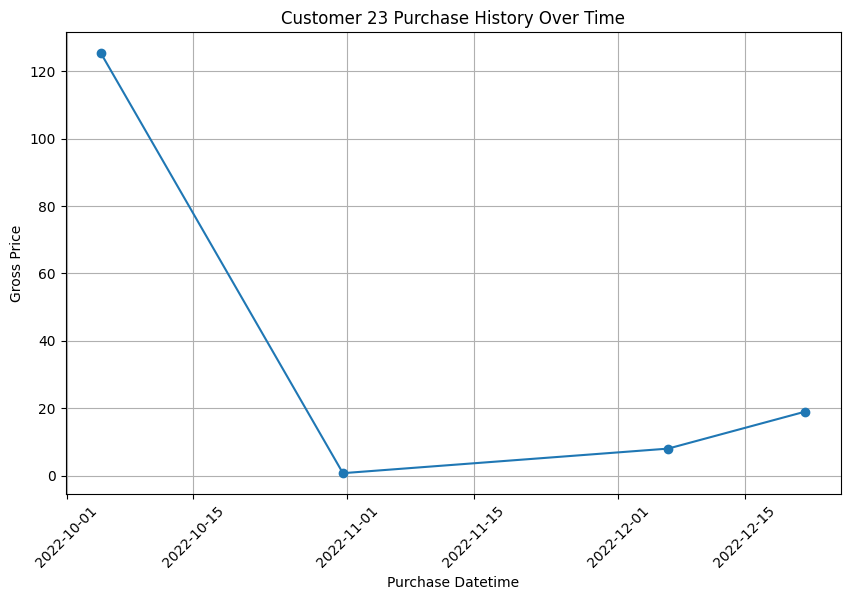

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for the specific customer
customer_data = data[data['customer_id'] == 23]

# Convert purchase_datetime to datetime format
customer_data['purchase_datetime'] = pd.to_datetime(customer_data['purchase_datetime'])

# Sort data by purchase_datetime
customer_data = customer_data.sort_values(by='purchase_datetime')

# Plot the purchase history over time
plt.figure(figsize=(10, 6))
plt.plot(customer_data['purchase_datetime'], customer_data['gross_price'], marker='o', linestyle='-')
plt.title('Customer 23 Purchase History Over Time')
plt.xlabel('Purchase Datetime')
plt.ylabel('Gross Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Churn Analysis

In [9]:
from datetime import timedelta
from customer_focus_churn_rfm import create_sliding_window_churn_label, prepare_features, prepare_features_no_window, preprocess_data, train_churn_model


print("Creating sliding window churn labels...")
# Create sliding window churn labels
churn_labels = create_sliding_window_churn_label(data)

print("Preparing features...")
# Prepare features
features_df = prepare_features(data, churn_labels)

print("Preprocessing additional features...")
# Preprocess additional features
additional_features_df, preprocessor = preprocess_data(data)
features_df = features_df.merge(additional_features_df, on='customer_id', how='left')

print("Training model...")
# Train the model
model, feature_names, (X_train, X_test, y_train, y_test), scaler = train_churn_model(features_df, preprocessor)

# filter the data for the last 90 days
last_window_data = data[(data['purchase_datetime'] >= data['purchase_datetime'].max() - timedelta(days=90))]

# Prepare features for the current data
last_window_features = prepare_features_no_window(last_window_data)

prepared_data = last_window_features

# Preprocess the last window features
last_window_features_preprocessed, _ = preprocess_data(last_window_data, preprocessor)

last_window_features_df = last_window_features_preprocessed.merge(last_window_features, on='customer_id', how='left')

# Predict churn probabilities using the trained model
churn_proba_last_window = model.predict_proba(last_window_features_df[feature_names])[:, 1]

# Add churn probabilities to the last window features DataFrame
last_window_features_df['churn_probability'] = churn_proba_last_window

Creating sliding window churn labels...
Preparing features...


/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_data['month'] = window_data['purchase_datetime'].dt.to_period('M')
/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_data['month'] = window_data['purchase_datetime'].dt.to_period('M')
/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:224: SettingWithCopyWarning: 
A

Preprocessing additional features...
Shape of transformed data: (91700, 57)
Expected number of columns: 57
Training model...
Shape of transformed data: (23182, 57)
Expected number of columns: 57


/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['email_provider'] = data['email_provider'].apply(lambda x: x if x in top_3_providers else 'others')
/home/zeus/miniconda3/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.74     11363
           1       0.92      0.99      0.95     51333

    accuracy                           0.92     62696
   macro avg       0.94      0.80      0.85     62696
weighted avg       0.92      0.92      0.92     62696


Confusion Matrix:
[[ 6842  4521]
 [  332 51001]]

ROC AUC Score: 0.9467


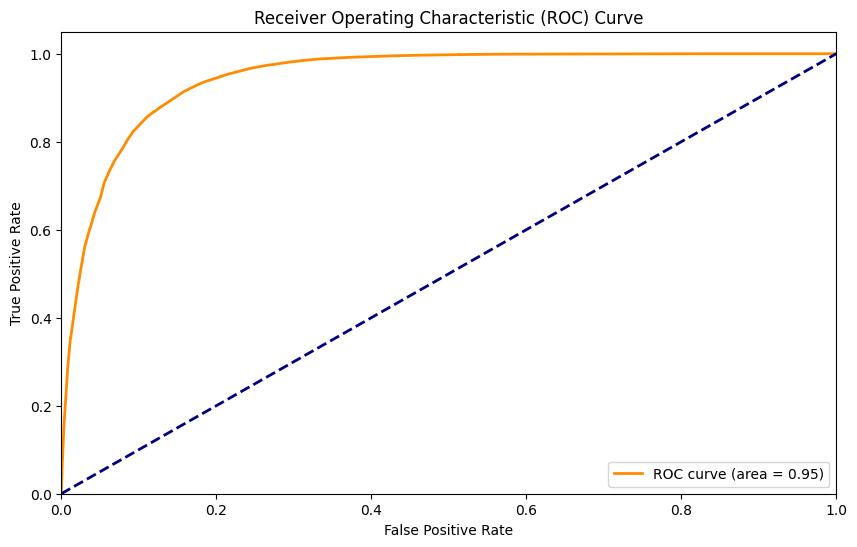

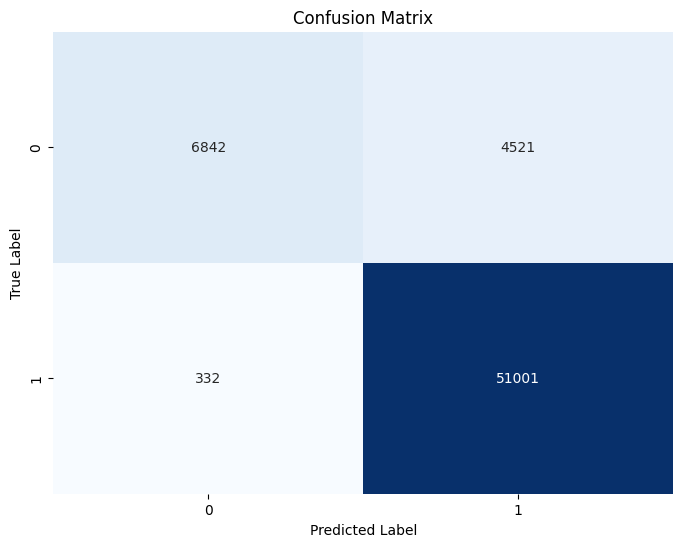

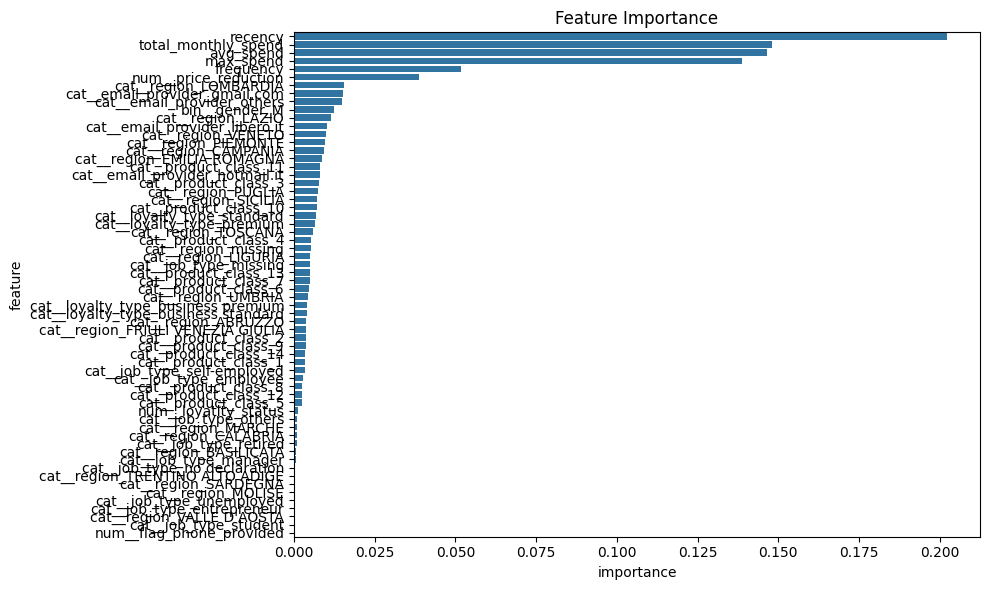

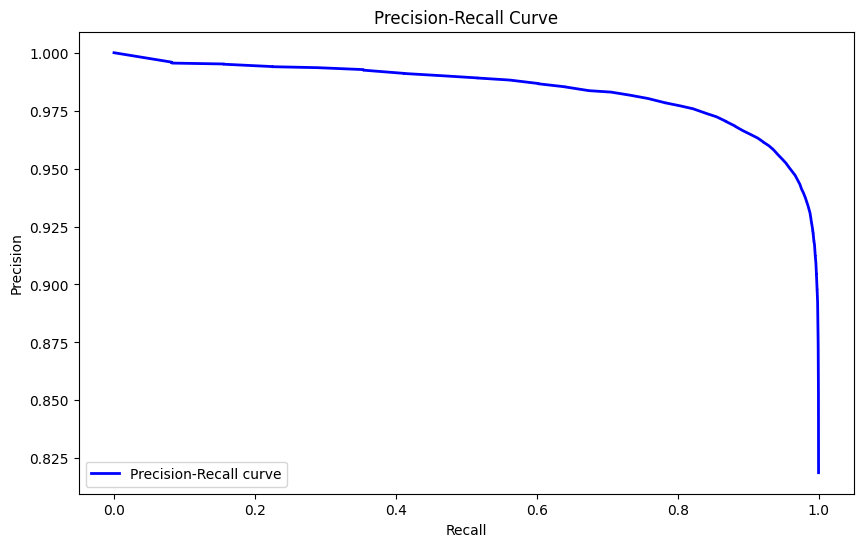

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import pandas as pd
from customer_focus_churn_rfm import evaluate_model

evaluation_results = evaluate_model(model, X_test, y_test)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix = evaluation_results['confusion_matrix']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


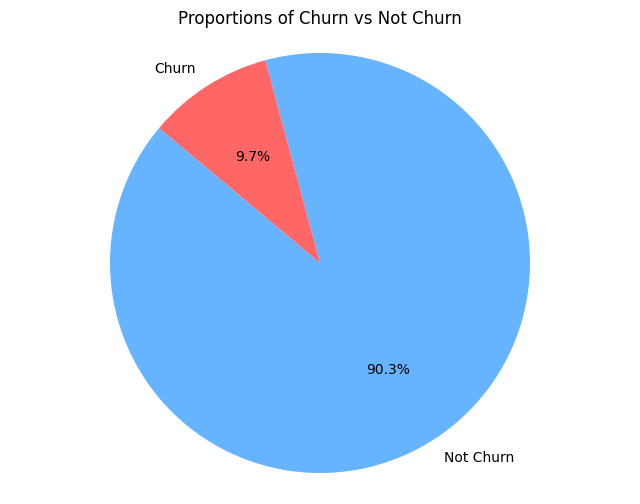

In [11]:
import matplotlib.pyplot as plt
# Plot the proportions between churn and not churn

# Calculate the proportions
churn_proportions = churn_labels['churned'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_proportions, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Proportions of Churn vs Not Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


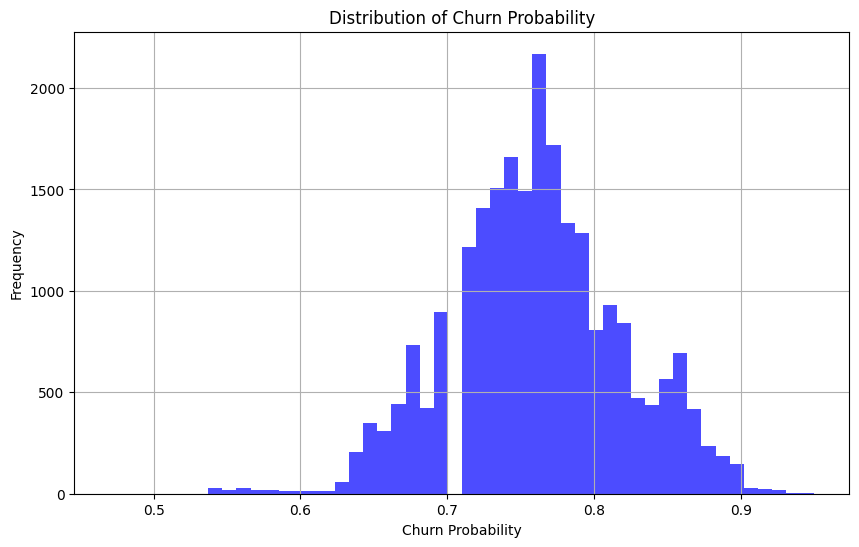

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_churn_probability(data: pd.DataFrame) -> None:
    """
    Plots the churn probability for the given data.

    Parameters
    ----------
    data : pd.DataFrame
        The DataFrame containing the churn probability and other features.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data['churn_probability'], bins=50, color='blue', alpha=0.7)
    plt.xlabel('Churn Probability')
    plt.ylabel('Frequency')
    plt.title('Distribution of Churn Probability')
    plt.grid(True)
    plt.show()

# Plot churn probability
plot_churn_probability(last_window_features_df)


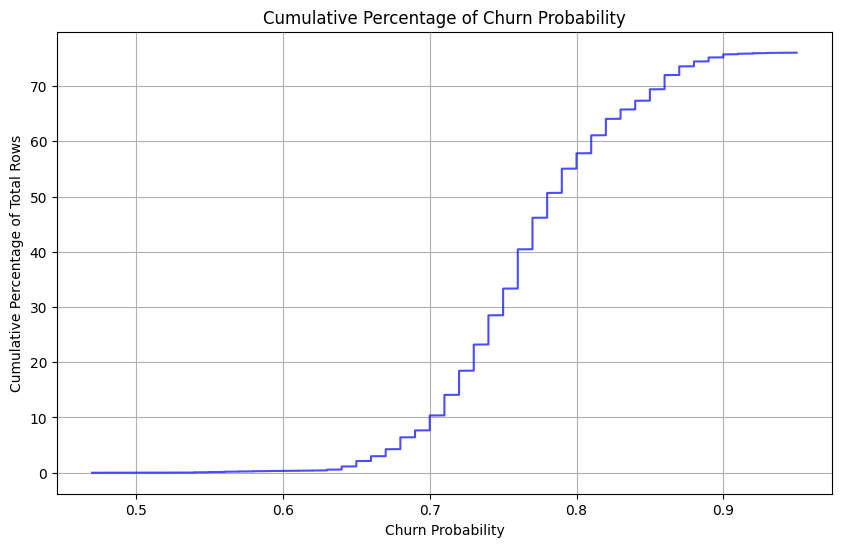

In [13]:
import matplotlib.pyplot as plt

def plot_cumulative_churn_probability(data: pd.DataFrame) -> None:
    """
    Plots the cumulative sum of the churn probability as a percentage of the total number of rows for the given data.

    Parameters
    ----------
    data : pd.DataFrame
        The DataFrame containing the churn probability and other features.
    """
    plt.figure(figsize=(10, 6))
    data_sorted = data.sort_values('churn_probability')
    cumulative_sum = data_sorted['churn_probability'].cumsum()
    total_rows = len(data)
    cumulative_percentage = (cumulative_sum / total_rows) * 100
    plt.plot(data_sorted['churn_probability'], cumulative_percentage, color='blue', alpha=0.7)
    plt.xlabel('Churn Probability')
    plt.ylabel('Cumulative Percentage of Total Rows')
    plt.title('Cumulative Percentage of Churn Probability')
    plt.grid(True)
    plt.show()

# Plot cumulative churn probability
plot_cumulative_churn_probability(last_window_features_df)


In [14]:
from customer_focus_churn_rfm import identify_high_value_customers

high_value_at_risk = identify_high_value_customers(last_window_features_df)

/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_at_risk['RFM_cluster'] = pd.qcut(rfm_scaled['RFM_avg'], q=3, labels=["Low", "Medium", "High"])


In [23]:
target_campain = high_value_at_risk[(high_value_at_risk['RFM_cluster'] == 'High') & (high_value_at_risk['churn_probability'] > 0.8)]
target_campain.head()

,num__price_reduction,num__flag_phone_provided,num__loyatlty_status,cat__product_class_1,cat__product_class_2,cat__product_class_3,cat__product_class_4,cat__product_class_5,cat__product_class_6,cat__product_class_7,...,cat__email_provider_others,bin__gender_M,customer_id,frequency,total_monthly_spend,avg_spend,max_spend,recency,churn_probability,RFM_cluster
15651,0.033180,0.0,0.07367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,761644,2,43.96,21.980000,27.98,89,0.85,High
11100,-0.101241,0.0,0.07367,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,601141,4,48.16,12.040000,24.95,52,0.84,High
15652,0.133995,0.0,0.07367,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,761644,2,43.96,21.980000,27.98,89,0.84,High
7933,5.388168,0.0,0.07367,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,420099,3,503.59,167.863333,405.90,65,0.83,High
11513,0.012176,0.0,0.07367,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,617630,3,44.13,14.710000,19.25,85,0.83,High


In [24]:
target_campain.columns

Index(['num__price_reduction', 'num__flag_phone_provided',
       'num__loyatlty_status', 'cat__product_class_1', 'cat__product_class_2',
       'cat__product_class_3', 'cat__product_class_4', 'cat__product_class_5',
       'cat__product_class_6', 'cat__product_class_7', 'cat__product_class_8',
       'cat__product_class_9', 'cat__product_class_10',
       'cat__product_class_11', 'cat__product_class_12',
       'cat__product_class_13', 'cat__product_class_14',
       'cat__job_type_employee', 'cat__job_type_entrepreneur',
       'cat__job_type_manager', 'cat__job_type_missing',
       'cat__job_type_no declaration', 'cat__job_type_others',
       'cat__job_type_retired', 'cat__job_type_self-employed',
       'cat__job_type_student', 'cat__job_type_unemployed',
       'cat__region_ABRUZZO', 'cat__region_BASILICATA', 'cat__region_CALABRIA',
       'cat__region_CAMPANIA', 'cat__region_EMILIA ROMAGNA',
       'cat__region_FRIULI VENEZIA GIULIA', 'cat__region_LAZIO',
       'cat__region_LI

In [25]:
import pandas as pd

def decode_one_hot(df: pd.DataFrame, prefixes: list) -> pd.DataFrame:
    """
    Decodes one-hot encoded categorical variables into a single column for each prefix.

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing one-hot encoded columns.
    prefixes : list
        A list of prefixes identifying the one-hot encoded columns.

    Returns
    -------
    pd.DataFrame
        The dataframe with decoded one-hot columns.
    """
    for prefix in prefixes:
        # Filter columns based on the prefix
        columns = [col for col in df.columns if col.startswith(prefix)]
        
        if columns:
            # Decode one-hot into a single categorical variable
            df[prefix + 'decoded'] = df[columns].idxmax(axis=1).apply(lambda x: x.replace(prefix, ''))

            # Drop the one-hot encoded columns
            df.drop(columns, axis=1, inplace=True)

    return df

one_hot_prefixes = [
    'cat__product_class_', 'cat__job_type_', 'cat__region_', 'cat__loyalty_type_', 'cat__email_provider_'
]

# Decode one-hot encoded variables
df = decode_one_hot(target_campain, one_hot_prefixes)

# You can view the decoded dataframe
print(df.head())

       num__price_reduction  num__flag_phone_provided  num__loyatlty_status  \
15651              0.033180                       0.0               0.07367   
11100             -0.101241                       0.0               0.07367   
15652              0.133995                       0.0               0.07367   
7933               5.388168                       0.0               0.07367   
11513              0.012176                       0.0               0.07367   

       bin__gender_M  customer_id  frequency  total_monthly_spend   avg_spend  \
15651            0.0       761644          2                43.96   21.980000   
11100            1.0       601141          4                48.16   12.040000   
15652            0.0       761644          2                43.96   21.980000   
7933             1.0       420099          3               503.59  167.863333   
11513            0.0       617630          3                44.13   14.710000   

       max_spend  recency  churn_proba

/tmp/ipykernel_69849/3822387635.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[prefix + 'decoded'] = df[columns].idxmax(axis=1).apply(lambda x: x.replace(prefix, ''))
/tmp/ipykernel_69849/3822387635.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns, axis=1, inplace=True)
/tmp/ipykernel_69849/3822387635.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
# Calculate the total number of rows
total_rows = len(high_value_at_risk)

# Filter out rows where RFM_cluster is different from 'High'
filtered_rfm_cluster = high_value_at_risk[high_value_at_risk['RFM_cluster'] != 'High']
num_filtered_rfm_cluster = len(filtered_rfm_cluster)
percentage_filtered_rfm_cluster = (num_filtered_rfm_cluster / total_rows) * 100

# Filter out rows where churn_probability is less than 0.8
filtered_churn_probability = high_value_at_risk[high_value_at_risk['churn_probability'] < 0.8]
num_filtered_churn_probability = len(filtered_churn_probability)
percentage_filtered_churn_probability = (num_filtered_churn_probability / total_rows) * 100

# Filter out rows where both conditions are verified
filtered_both_conditions = high_value_at_risk[(high_value_at_risk['RFM_cluster'] != 'High') | (high_value_at_risk['churn_probability'] < 0.8)]
num_filtered_both_conditions = len(filtered_both_conditions)
percentage_filtered_both_conditions = (num_filtered_both_conditions / total_rows) * 100

# Calculate the total number of rows with both conditions verified
num_both_conditions_verified = total_rows - num_filtered_both_conditions
percentage_both_conditions_verified = (num_both_conditions_verified / total_rows) * 100

# Print the results
print(f"Number of rows filtered out for RFM_cluster different from 'High': {num_filtered_rfm_cluster} ({percentage_filtered_rfm_cluster:.2f}%)")
print(f"Number of rows filtered out for churn_probability less than 0.8: {num_filtered_churn_probability} ({percentage_filtered_churn_probability:.2f}%)")
# print(f"Number of rows filtered out for both conditions: {num_filtered_both_conditions} ({percentage_filtered_both_conditions:.2f}%)")

# Print the result
print(f"Number of High-value customers to target with retention campaign: {num_both_conditions_verified} ({percentage_both_conditions_verified:.2f}%)")

Number of rows filtered out for RFM_cluster different from 'High': 2947 (66.69%)
Number of rows filtered out for churn_probability less than 0.8: 1150 (26.02%)
Number of High-value customers to target with retention campaign: 1310 (29.64%)
